In [48]:
import os
import wikipedia
import nltk
from nltk.tag.stanford import StanfordPOSTagger
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from pycontractions import Contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from num2words import num2words
import matplotlib.pyplot as plt


# need to be local and downloaded. Current path assumes it is in the same folder
# download from: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
cont = Contractions('GoogleNews-vectors-negative300.bin')

# # takes a bit
# cont.load_models()

[nltk_data] Downloading package punkt to /home/irikos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/irikos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
tagger=StanfordPOSTagger('./english-bidirectional-distsim.tagger', './stanford-postagger.jar')

In [7]:
# we're gonna use the Elon Musk page in this homework, just like in the 2nd homework
# note: the page cannot be found by 'Elon Musk', as is the link

# 1.1 Choose a wikipedia article. You will download and acces the article using this python module: wikipedia. 
# Use the content property to extract the text. Print the title of the article and the first N=200 words from 
# the article to verify that all works well. Print the POS-tagging for the first N=20 sentences.

page = wikipedia.page('Musk Elon')
title = page.title
content = page.content


# title of the article and the first N=200 words
print(title)

tokenizer = nltk.RegexpTokenizer(r"\w+")
only_words = tokenizer.tokenize(content)
print(only_words[:200])

# The POS-tagging for the first N=20 sentences.
sentences = nltk.sent_tokenize(content)
for sentence in sentences[:20]:
    sentence_words = tokenizer.tokenize(sentence)
    print(tagger.tag(sentence_words))

# I initially did this, but feel that the for approach is clerer for each sentence.
# tagger.tag(sentences[:20])

Elon Musk
['Elon', 'Reeve', 'Musk', 'born', 'June', '28', '1971', 'is', 'an', 'engineer', 'industrial', 'designer', 'and', 'technology', 'entrepreneur', 'He', 'is', 'a', 'citizen', 'of', 'South', 'Africa', 'the', 'United', 'States', 'where', 'he', 'has', 'lived', 'most', 'of', 'his', 'life', 'and', 'currently', 'resides', 'and', 'Canada', 'He', 'is', 'the', 'founder', 'CEO', 'and', 'chief', 'engineer', 'designer', 'of', 'SpaceX', 'co', 'founder', 'CEO', 'and', 'product', 'architect', 'of', 'Tesla', 'Inc', 'founder', 'of', 'The', 'Boring', 'Company', 'co', 'founder', 'of', 'Neuralink', 'and', 'co', 'founder', 'and', 'initial', 'co', 'chairman', 'of', 'OpenAI', 'He', 'was', 'elected', 'a', 'Fellow', 'of', 'the', 'Royal', 'Society', 'FRS', 'in', '2018', 'In', 'December', '2016', 'he', 'was', 'ranked', '21st', 'on', 'the', 'Forbes', 'list', 'of', 'The', 'World', 's', 'Most', 'Powerful', 'People', 'and', 'was', 'ranked', 'joint', 'first', 'on', 'the', 'Forbes', 'list', 'of', 'the', 'Most', 

In [9]:
# 1.2 
# Create a function that receives a part of speech tag and returns a list with all the words from 
# the text (can be given as a parameter too) that represent that part of speech. 
def find_speech_parts(part_of_speech, text):
    returned_list = []
    for tag in tagger.tag(text):
        if (part_of_speech == tag[1]):
            returned_list.append(tag[0])
    return returned_list

print (find_speech_parts('NN', sentences[:5]))

# Create a function that receives a list of POS tags and returns a list with words having any of 
# the given POS tags (use the first function in implementing the second one).
def find_words_by_pos(pos_tag_list, text):
    returned_list = []
    for tag in pos_tag_list:
        returned_list.append(find_speech_parts(tag, text))
    return returned_list


print (find_words_by_pos(['PRP', 'RB', 'NN'], sentences[:5]))


['designer', 'technology', 'entrepreneur.', 'citizen', '(where', 'life', 'engineer/designer', 'CEO', 'product', 'architect', 'founder', 'Company;', 'co-founder', 'Neuralink;', 'co-founder', 'co-chairman', 'OpenAI.', 'list', 'list']
[['He', 'he', 'He', 'He', 'he'], ['currently'], ['designer', 'technology', 'entrepreneur.', 'citizen', '(where', 'life', 'engineer/designer', 'CEO', 'product', 'architect', 'founder', 'Company;', 'co-founder', 'Neuralink;', 'co-founder', 'co-chairman', 'OpenAI.', 'list', 'list']]


In [17]:
# 1.3 Use the function above to print all the nouns (there are multiple tags for nouns), and, respectively all the verbs (corresponding to all verb tags). Also, print the percentage of content words (noun+verbs) from the entire text

# all the nouns and all the verbs
# wasn't sure if by nouns you also mean propouns. In that case, 'PP', 'PPZ', 'WP', 'WP$' should be added.
nouns = find_words_by_pos(['NN', 'NNS', 'NP', 'NPS'], sentences)
# print (nouns)

NN
NNS
NP
NPS
[['designer,', 'technology', 'entrepreneur', 'philanthropist.', 'citizen', '(where', 'life', 'engineer/designer', 'CEO', 'product', 'architect', 'founder', 'Company;', 'co-founder', 'Neuralink;', 'co-founder', 'co-chairman', 'OpenAI.', 'list', 'list', 'worth', 'person', 'world.', 'CEO', 'manufacturer', 'globally.Born', 'briefly', 'later,', "bachelor's", 'degree', "bachelor's", 'degree', 'Ph.D.', 'material', 'business', 'career.', '(with', 'brother', 'web', 'software', 'company,', 'X.com,', 'bank.', 'Confinity', 'year', 'SpaceX,', 'aerospace', 'manufacturer', 'space', 'transport', 'company,', 'designer.', 'vehicle', 'manufacturer,', 'year', 'founded,', 'CEO', 'product', 'architect.', '2006,', 'creation', 'SolarCity,', 'energy', 'company', 'subsidiary', 'Musk', 'OpenAI,', 'research', 'company', 'intelligence.', 'Neuralink,', 'neurotechnology', 'company', 'Company,', 'infrastructure', 'tunnel', 'construction', 'company', 'vehicles.', 'investor', 'stock', 'market.', 'addition

In [27]:
# 1.3
verbs = find_words_by_pos(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'VH', 'VHD', 'VHG', 'VHN', 'VHP', 'VHZ', 'VV', 'VVD', 'VVG', 'VVN', 'VVP', 'VVZ'], sentences)
print (verbs)

VB
VBD
VBG
VBN
VBP
VBZ
VH
VHD
VHG
VHN
VHP
VHZ
VV
VVD
VVG
VVN
VVP
VVZ
[['attend', 'pursue', 'promote', 'revolve', '"change', 'help', 'humanity".', 'try', 'take', 'prolong', 'reduce', 'go', 'move', 'be', 'get', 'study', 'go', 'pursue', 'launch', 'abandon', 'become', 'move', 'land', 'reawaken', 'buy', 'send', 'look', 'start', 'build', 'cut', 'enjoy', 'Puff', 'put', 'lift', 'provide', 'launch', 'berth', 'develop', 'make', 'space.', 'provide', 'deploy', 'be', 'serve', 'destroy', 'spell', 'extinguish', 'expand', 'go', 'reduce', 'send', "Mars'", 'establish', 'have', 'be', 'be', 'explore', 'colonize', 'support', 'replace', 'have', 'use', 'be', 'actuate,', 'upgrade', 'escape', 'oversaw', 'Build', 'build', 'build', 'bring', 'name', 'overcome', 'expand', 'allow', 'be', 'entice', 'speed', 'Create', 'Expand', 'address', 'Develop', 'Enable', 'make', 'install', 'be', 'help', 'alleviate', 'be', 'be', 'confirm', 'bar', 'step', 'regret', 'monitor', 'be', 'respect', 'build', 'hold', 'need', 'visit', 'iss

In [28]:
# 1.3
total_nouns = 0
for noun_list in nouns:
    total_nouns += len(noun_list)
    
total_verbs = 0

for verb_list in verbs:
    total_verbs += len(verb_list)

print (total_nouns)
print (total_verbs)
print (len(only_words))

print ("Noun percentage:", total_nouns / len(only_words) * 100)
print ("Verb percentage:", total_verbs / len(only_words) * 100)

2351
1612
11530
Noun percentage: 20.39028620988725
Verb percentage: 13.980919340849956


In [39]:
# 1.4
# Print a table of four columns. The columns will be separated with the character "|". 
# The head of the table will be:
# Original word | POS | Simple lemmatization | Lemmatization with POS
# that will compare the results of lemmatization (WordNetLemmatizer) without giving the part of speech 
# and the lemmatization with the given part of speech for each word. The table must contain only words 
# that give different results for the two lemmatizations (for example, the word "running" - without 
# POS, the result will always be running, but with pos="v" it is "run"). The table will contain the 
# results for the first N sentences from the text (each row corresponding to a word). Try to print 
# only distinct results inside the table (for example, if a word has two occurnces inside the text, 
# and matches the requirments for appearing in the table, it should have only one corresponding row).

# taken from stackoverflow
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

lem = WordNetLemmatizer()

dict_words = {}
table = []
for sentence in sentences[:1]:
    sentence_words = tokenizer.tokenize(sentence)
    for word in sentence_words:
        tagged_word = tagger.tag([word])
        word = tagged_word[0][0]
        long_pos = tagged_word[0][1]
        pos = get_wordnet_pos(long_pos)
        lem_word = lem.lemmatize(word)
        try:
            lem_word_pos = lem.lemmatize(word, pos=pos)
            if (lem_word != lem_word_pos and word not in dict_words):
                dict_words[word] = [word, long_pos, lem_word, lem_word_pos]
#             print(word, long_pos, lem_word, lem_word_pos)
        except:
            print("oh, well")

print("Original word | POS | Simple lemmatization | Lemmatization with POS")
for key in dict_words:
    print(dict_words[key])
    

Original word | POS | Simple lemmatization | Lemmatization with POS
['born', 'VBN', 'born', 'bear']
['is', 'VBZ', 'is', 'be']


In [50]:
# 1.5 Print a graphic showing the number of words for each part of speech. 
# If there are too many different parts of speech, 
# you can print only those with a higher number of corresponding words.

part_frequency = {}
for part in tagger.tag(sentences):
    if part[1] in part_frequency:
        part_frequency[part[1]] += 1
    else: 
        part_frequency[part[1]] = 0

print (part_frequency)

{'NNP': 1764, 'VBN': 281, 'CD': 333, 'VBZ': 190, 'DT': 995, 'JJ': 696, 'NN': 2020, 'CC': 311, 'PRP': 228, 'IN': 1455, 'NNPS': 26, 'JJS': 26, 'PRP$': 116, 'RB': 241, 'FW': 421, 'VBD': 522, 'NNS': 334, 'VBG': 227, 'TO': 299, 'WRB': 37, 'VB': 296, 'RP': 23, 'WDT': 65, 'VBP': 112, 'JJR': 25, 'WP': 27, 'MD': 84, 'EX': 13, 'RBS': 6, 'RBR': 12, 'SYM': 1, 'PDT': 2, ':': 9, 'WP$': 0}


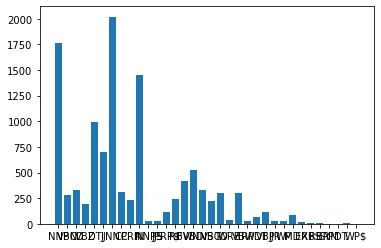

In [51]:
plt.bar(range(len(part_frequency)), list(part_frequency.values()), align='center')
plt.xticks(range(len(part_frequency)), list(part_frequency.keys()))
plt.show()